In [1]:
base_directory = '/home/shoaib/ZTFDataChallenge/'

import sys
sys.path.insert(0, base_directory + 'dmdt_Analysis/')
sys.path.insert(0, base_directory + 'SOM/')

from dmdt_functions import *
from QNPy.Clustering_with_SOM import *

In [2]:
import numpy as np
import pandas as pd

from tqdm.auto import tqdm
tqdm.pandas(desc="Lightcurves Processed")

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.rcParams['axes.grid'] = False
# plt.style.use('seaborn-v0_8-colorblind')

In [3]:
### Loading the lightcurves by name
lightcurves_by_name = pd.read_pickle(base_directory + 'lightcurves_by_name_1day_binned.pkl')[['name', 'r_lightcurve','r_n_good_det','r_timespan_good','g_lightcurve','g_n_good_det','g_timespan_good']]
lightcurves_by_name = lightcurves_by_name.dropna(axis=0)
# lightcurves_by_name = lightcurves_by_name.query("type in @qso_types")
### Sampling to save memory
# lightcurves_by_name = lightcurves_by_name.sample(frac=0.1)

### Loading the lightcurves by OID
# lightcurves_by_oid = pd.read_pickle(base_directory + 'lightcurves_by_oid_1day_binned.pkl')[['oid_alerce', 'lightcurve','n_good_det','timespan_good']] 
# lightcurves_by_oid = lightcurves_by_oid.dropna(axis=0)
# lightcurves_by_oid = lightcurves_by_oid.query("type in @qso_types")
### Sampling to save memory
# lightcurves_by_oid = lightcurves_by_oid.sample(frac=0.1)

### What are the distributions in number of epochs and time-spans?

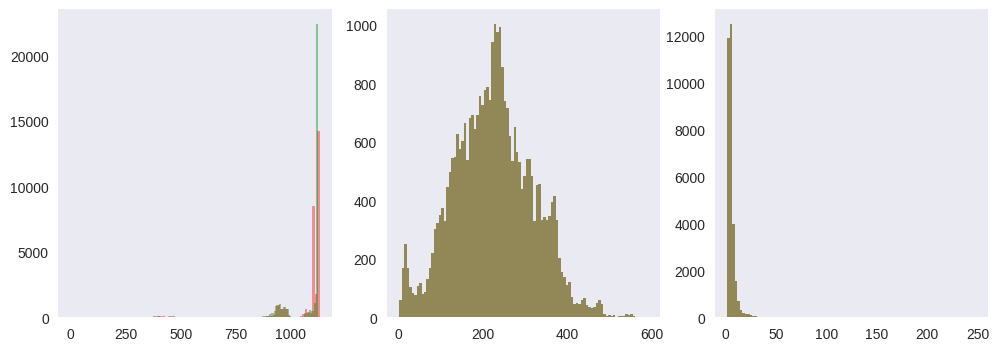

In [10]:
bins = 100

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axs[0].hist(lightcurves_by_name['r_timespan_good'], bins=bins, color='r', alpha=0.4)
axs[0].hist(lightcurves_by_name['g_timespan_good'], bins=bins, color='g', alpha=0.4)

axs[1].hist(lightcurves_by_name['r_n_good_det'], bins=bins, color='r', alpha=0.4)
axs[1].hist(lightcurves_by_name['r_n_good_det'], bins=bins, color='g', alpha=0.4)

axs[2].hist(lightcurves_by_name['r_timespan_good'] / lightcurves_by_name['r_n_good_det'], bins=bins, color='r', alpha=0.4)
axs[2].hist(lightcurves_by_name['r_timespan_good'] / lightcurves_by_name['r_n_good_det'], bins=bins, color='g', alpha=0.4)

plt.show()

In [12]:
import numpy as np
np.arange(0.2, 12 + 0.2, .2)

array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. ])

In [13]:
np.arange(0.2, 12 + 0.2, .2).shape

(60,)

In [3]:
# Example money array
money = np.random.uniform(100, 1000, size=1000)  # Replace with your actual array

# Step 1: Define bin edges
start, stop, step = 100, 1000, 50
bins = np.arange(start, stop + step, step)  # Include the rightmost edge

# Step 2: Get histogram
counts, edges = np.histogram(money, bins=bins)

# Step 3: Remove bins with 0 count
nonzero_mask = counts > 0
filtered_counts = counts[nonzero_mask]

# For each bin: (left_edge, right_edge)
bin_edges = list(zip(edges[:-1], edges[1:]))
filtered_bins = np.array(bin_edges)[nonzero_mask]

# ✅ Now you have:
# - `filtered_bins`: shape (N, 2), each row is (start, end) of bin
# - `filtered_counts`: number of values in each retained bin

# Example printout
for (left, right), count in zip(filtered_bins, filtered_counts):
    print(f"[{left:.1f}, {right:.1f}]: {count} values")

[100.0, 150.0]: 42 values
[150.0, 200.0]: 50 values
[200.0, 250.0]: 47 values
[250.0, 300.0]: 51 values
[300.0, 350.0]: 55 values
[350.0, 400.0]: 61 values
[400.0, 450.0]: 61 values
[450.0, 500.0]: 56 values
[500.0, 550.0]: 67 values
[550.0, 600.0]: 47 values
[600.0, 650.0]: 52 values
[650.0, 700.0]: 57 values
[700.0, 750.0]: 55 values
[750.0, 800.0]: 67 values
[800.0, 850.0]: 55 values
[850.0, 900.0]: 65 values
[900.0, 950.0]: 64 values
[950.0, 1000.0]: 48 values


In [8]:
bin_edges

[(np.int64(100), np.int64(150)),
 (np.int64(150), np.int64(200)),
 (np.int64(200), np.int64(250)),
 (np.int64(250), np.int64(300)),
 (np.int64(300), np.int64(350)),
 (np.int64(350), np.int64(400)),
 (np.int64(400), np.int64(450)),
 (np.int64(450), np.int64(500)),
 (np.int64(500), np.int64(550)),
 (np.int64(550), np.int64(600)),
 (np.int64(600), np.int64(650)),
 (np.int64(650), np.int64(700)),
 (np.int64(700), np.int64(750)),
 (np.int64(750), np.int64(800)),
 (np.int64(800), np.int64(850)),
 (np.int64(850), np.int64(900)),
 (np.int64(900), np.int64(950)),
 (np.int64(950), np.int64(1000))]

In [5]:
edges[:-1]

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])

In [6]:
edges[1:]

array([ 150,  200,  250,  300,  350,  400,  450,  500,  550,  600,  650,
        700,  750,  800,  850,  900,  950, 1000])

In [6]:
a = np.array([1,2,3,4,5,6,7,8])

In [10]:
np.where(a>3)[0]

array([3, 4, 5, 6, 7])

In [11]:
a[np.where(a>3)[0]]

array([4, 5, 6, 7, 8])

In [3]:
import numpy as np

In [ ]:
lightcurves_by_name.apply(lambda row: np.savetxt(base_directory + f"SOM/curves_by_name/{row['name']}.csv",
                                                 row['r_lightcurve'],
                                                 delimiter=','),
                        axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
32226    None
32227    None
32228    None
32229    None
32230    None
Length: 31806, dtype: object

In [ ]:
lightcurves_by_name.apply(lambda row: np.savetxt(base_directory + f"SOM/curves_by_name/{row['name']}.csv",
                                                 row['g_lightcurve'],
                                                 delimiter=','),
                        axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
32226    None
32227    None
32228    None
32229    None
32230    None
Length: 31806, dtype: object

In [ ]:
light_curves, ids = Load_Light_Curves('Light_Curves', one_filter=True)